![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/68886973-eca24380-06f6-11ea-8327-3e9a22e22b43.png"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# Health and Obesity trends

Let's put in practice the topics covered in the course and analyze health and obesity trends.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!

In [9]:
import numpy as np
import pandas as pd
import sqlite3
import requests

%matplotlib inline

In [5]:
!git clone https://github.com/ine-rmotr-projects/RDP-health-and-obesity-trends.git

Cloning into 'RDP-health-and-obesity-trends'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 31 (delta 11), reused 23 (delta 6), pack-reused 0
Receiving objects: 100% (31/31), 161.60 KiB | 3.51 MiB/s, done.
Resolving deltas: 100% (11/11), done.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the dump of `USDA Food Composition Database` into a `food_df` DataFrame variable.

The National Nutrient Database (NNDB) is provided by the [USDA](https://ndb.nal.usda.gov/ndb/) to allow the public to get standardized information on foods. They document the database and all supporting information on the USDA website.

> Although the file format says "txt", we call these plain CSVs files and read it using `read_csv` method. Be aware of parsing correctly `NaN` values, data separator, encoding, quotechar and any other parsing option you think necessary.

Here's a preview of that file:

In [6]:
!head /content/RDP-health-and-obesity-trends/data/FOOD_DES.txt

~01001~^~0100~^~Butter, salted~^~BUTTER,WITH SALT~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01002~^~0100~^~Butter, whipped, with salt~^~BUTTER,WHIPPED,W/ SALT~^^^~Y~^^0^^6.38^^^
~01003~^~0100~^~Butter oil, anhydrous~^~BUTTER OIL,ANHYDROUS~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01004~^~0100~^~Cheese, blue~^~CHEESE,BLUE~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01005~^~0100~^~Cheese, brick~^~CHEESE,BRICK~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01006~^~0100~^~Cheese, brie~^~CHEESE,BRIE~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01007~^~0100~^~Cheese, camembert~^~CHEESE,CAMEMBERT~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01008~^~0100~^~Cheese, caraway~^~CHEESE,CARAWAY~^^^^^0^^6.38^4.27^8.79^3.87
~01009~^~0100~^~Cheese, cheddar (Includes foods for USDA's Food Distribution Program)~^~CHEESE,CHEDDAR~^^^~Y~^^0^^^^^
~01010~^~0100~^~Cheese, cheshire~^~CHEESE,CHESHIRE~^^^^^0^^6.38^4.27^8.79^3.87


The column names are taken from the original documentation for this dataset.

> Use the given column names while reading the data.

In [7]:
column_names = ['NDB_No', 'FdGrp_Cd', 'Long_Desc', 'Shrt_Desc', 'ComName',
                'ManufacName', 'Survey', 'Ref_desc', 'Refuse', 'SciName',
                'N_Factor', 'Pro_Factor', 'Fat_Factor', 'CHO_Factor']

In [10]:
# your code goes here
food=pd.read_csv('/content/RDP-health-and-obesity-trends/data/FOOD_DES.txt',
                 sep='^',
                 quotechar='~',
                 header=None,
                 names=column_names)



How many products do we have?

In [11]:
# your code goes here
food.shape[0]

2429

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Variables distribution

Analyze how values are distributed:

- Create an histogram of `Refuse` variable.
- Create a boxplot of `N_Factor` variable.

<Axes: ylabel='Frequency'>

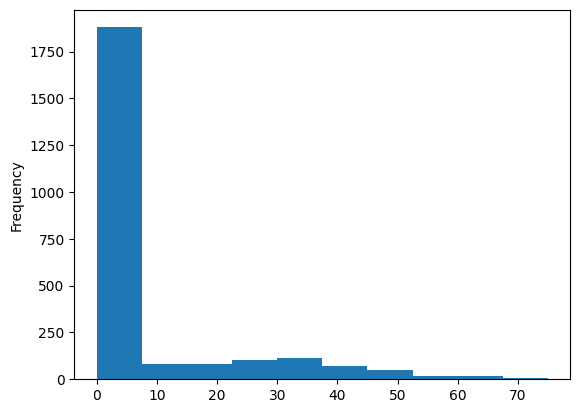

In [12]:
# your code goes here
food['Refuse'].plot(kind='hist')

<Axes: >

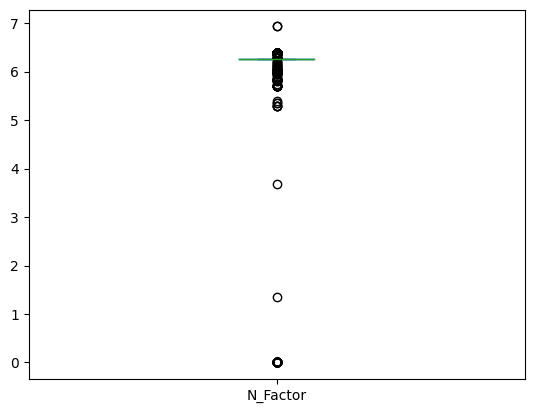

In [13]:
# your code goes here
food['N_Factor'].plot(kind='box')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which are the top-10 food manufacturers with more products on `food_df`.

In [16]:
# your code goes here
top10 = food['ManufacName'].value_counts().head(10)
top10

,count
ManufacName,
"The Quaker Oats, Co.",71
MEAD JOHNSON,40
MOM Brands,31
ABBOT NUTRTION,26
"Post Foods, LLC",21
"Kraft Foods, Inc.",18
Chobani,17
"B&G Foods, Inc",13
GERBER,12


Also create a bar plot showing that results.

<Axes: xlabel='ManufacName'>

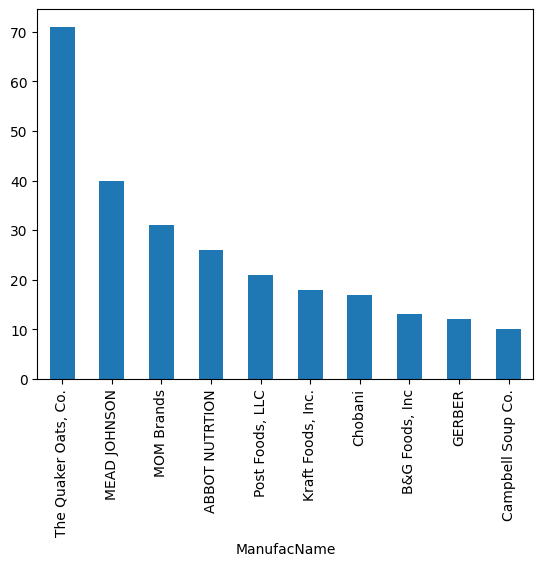

In [17]:
# your code goes here
top10.plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Analyzing Starbucks nutrition facts

Starbucks is an American coffee chain founded in Seattle. It serves both beverages and food.

<img width="650" alt="Starbucks" src="https://user-images.githubusercontent.com/7065401/68891327-57f01380-06ff-11ea-8461-eb35ba0c3bb0.png">

We'll analyze the nutritional information for Starbucks’ drink menu items using this [Nutrition facts for Starbucks drinks](https://www.kaggle.com/starbucks/starbucks) data. All nutritional information for drinks are for a 12oz serving size.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Getting Starbucks' drinks information

- Create an sqlite3 connection to the `starbucks.db` SQLite3 database.
- Read from the `drinks` table just the items with more than 100 calories and save them to a `drinks_df` DataFrame variable.

In [19]:
# your code goes here
conn = sqlite3.connect('/content/RDP-health-and-obesity-trends/data/starbucks.db')
drinks_df = pd.read_sql('SELECT * FROM drinks WHERE Calories >100;',conn)
conn.close()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which is the item with the highest calories?

In [22]:
# your code goes here
max_calories_item = drinks_df.loc[drinks_df['Calories'].idxmax()]
max_calories_item

,31
Item,Starbucks® Signature Hot Chocolate
Calories,430.0
Fat,26.0
Carb,45.0
Fiber,5.0
Protein,12.0
Sodium,115.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create two groups of items: "`less or equal 150 calories`" and "`more 150 calories`"

In [25]:
# your code goes here

less_equal_150_cal = drinks_df[drinks_df['Calories']<=150]
less_equal_150_cal.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
0,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
1,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0
2,Iced Espresso Classics - Caffe Mocha,140.0,2.5,23.0,0.0,5.0,90.0
3,Iced Espresso Classics - Caramel Macchiato,130.0,2.5,21.0,0.0,5.0,65.0
4,Tazo® Bottled Black Mango,150.0,0.0,38.0,0.0,0.0,15.0


In [27]:
# your code goes here

more_150_cal = drinks_df[drinks_df['Calories']>150]
more_150_cal.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
17,Starbucks® Doubleshot Protein Dark Chocolate,210.0,2.5,33.0,2.0,20.0,115.0
18,Starbucks® Doubleshot Protein Vanilla,200.0,2.5,34.0,2.0,20.0,120.0
30,Hot Chocolate,320.0,9.0,47.0,4.0,14.0,160.0
31,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0
32,Caffè Latte,190.0,7.0,19.0,0.0,13.0,170.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Compare item characteristics

Create a `compare_groups()` function that compares a given field of both groups of data, `less_equal_150_cal` and `more_150_cal`, by showing two overlapped histograms.

- You should use different colors per histogram. Also add a little bit of opacity (use `alpha=0.4`).
- The function MUST check that the given field exists, and raise `ValueError` with a "Field not found" message otherwise.


In [34]:
# your code goes here
def compare_groups(field):
    if field not in less_equal_150_cal.columns or field not in more_150_cal.columns:
        raise ValueError("Field not found")

    # Histogram for the less_equal_150_cal group
    less_equal_150_cal[field].plot(kind='hist',color='blue',alpha=0.4, title=field)

    # Histogram for the more_150_cal group
    more_150_cal[field].plot(kind='hist',color='red',alpha=0.4, title=field)

Validate your function showing a comparison of the `Calories` per group.

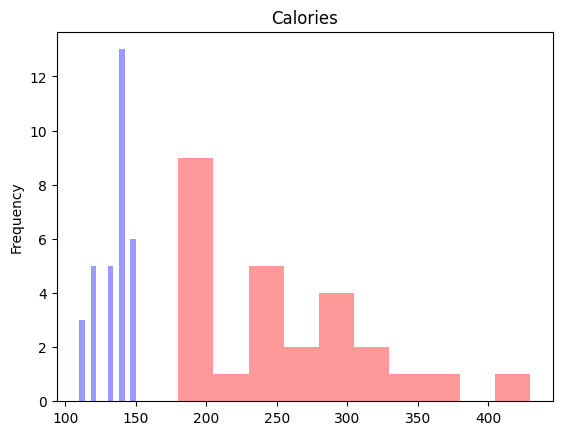

In [35]:
# your code goes here
compare_groups('Calories')

Now answer: **Less Calories implies less Sodium?**

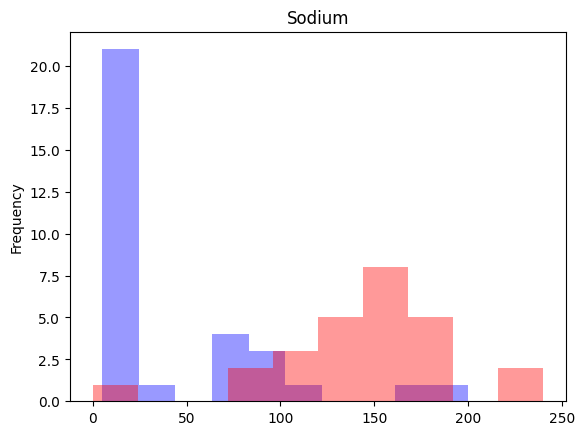

In [36]:
# your code goes here
compare_groups('Sodium')

**Less Calories implies less Carbs?**

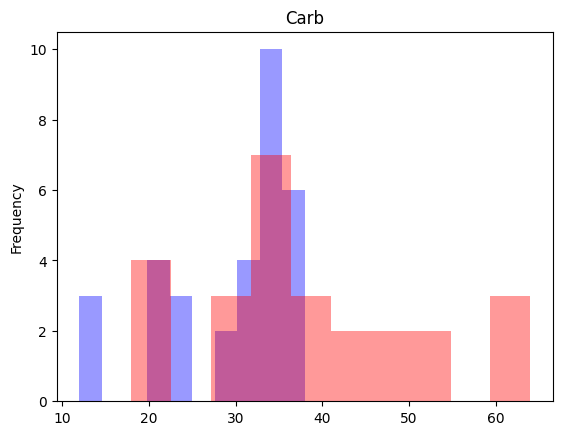

In [38]:
# your code goes here
compare_groups('Carb')

**Less Calories implies less Proteins?**

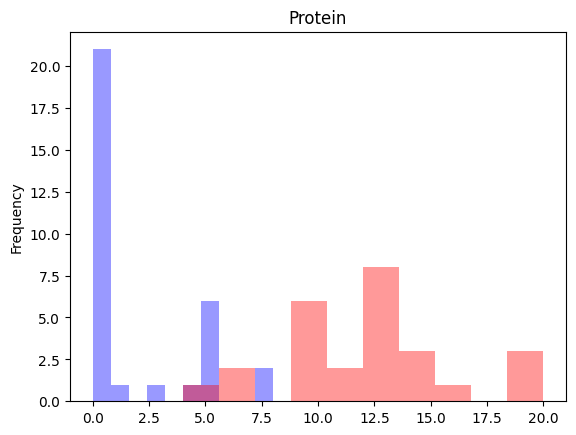

In [39]:
# your code goes here
compare_groups('Protein')


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Healthy diet interest

In order to measure interest on healthy diets, we'll analyze how many pageviews the article `Healthy diet` received during the last years.

![Food-piramid](https://user-images.githubusercontent.com/7065401/68880286-bf02cd80-06e9-11ea-8d42-ff6dbb539f7d.png)

To get pageviews from Wikipedia, we'll need to use the _Analytics API_. Here you can find [the documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews) to get pageviews from an article.

To get monthly pageviews for a given article, you can use the following endpoint:

```
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{ARTICLE}/monthly/{START}/{END}
```

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get data from Wikipedia using its API

Make a request to Wikipedia API to get monthly page views for `Healthy_diet` article from year 2015 (`2015010100`) to 2019 (`2019100100`).

Store the response in a `pageviews_df` DataFrame variable.

In [48]:
url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/Healthy_diet/monthly/2015010100/2019100100"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36'
}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()

    pageviews_df = pd.DataFrame(data['items'])
    print(pageviews_df.head())
else:
    print(f"Failed to retrieve data: {response.status_code}")


        project       article granularity   timestamp      access       agent  \
0  en.wikipedia  Healthy_diet     monthly  2015070100  all-access  all-agents   
1  en.wikipedia  Healthy_diet     monthly  2015080100  all-access  all-agents   
2  en.wikipedia  Healthy_diet     monthly  2015090100  all-access  all-agents   
3  en.wikipedia  Healthy_diet     monthly  2015100100  all-access  all-agents   
4  en.wikipedia  Healthy_diet     monthly  2015110100  all-access  all-agents   

   views  
0  24293  
1  41794  
2  23606  
3  26351  
4  24596  


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### When was the highest search peak?

Save in a `max_pageviews_str` variable the date where `Healthy_diet` article had the highest volume of page views.

Also save a `max_pageview_date` with that previous value parsed to `datetime`.

In [50]:
# your code goes here
from datetime import datetime
max_pageviews_df = pageviews_df.loc[pageviews_df['views'].idxmax()]
max_pageviews_str =max_pageviews_df['timestamp']
max_pageviews_date =datetime.strptime(max_pageviews_str, '%Y%m%d%H')

print(f"Date with the highest volume of page views (string): {max_pageviews_str}")
print(f"Date with the highest volume of page views (datetime): {max_pageviews_date}")


Date with the highest volume of page views (string): 2017070100
Date with the highest volume of page views (datetime): 2017-07-01 00:00:00


We can draw a quick plot showing the evolution of `views` per month:

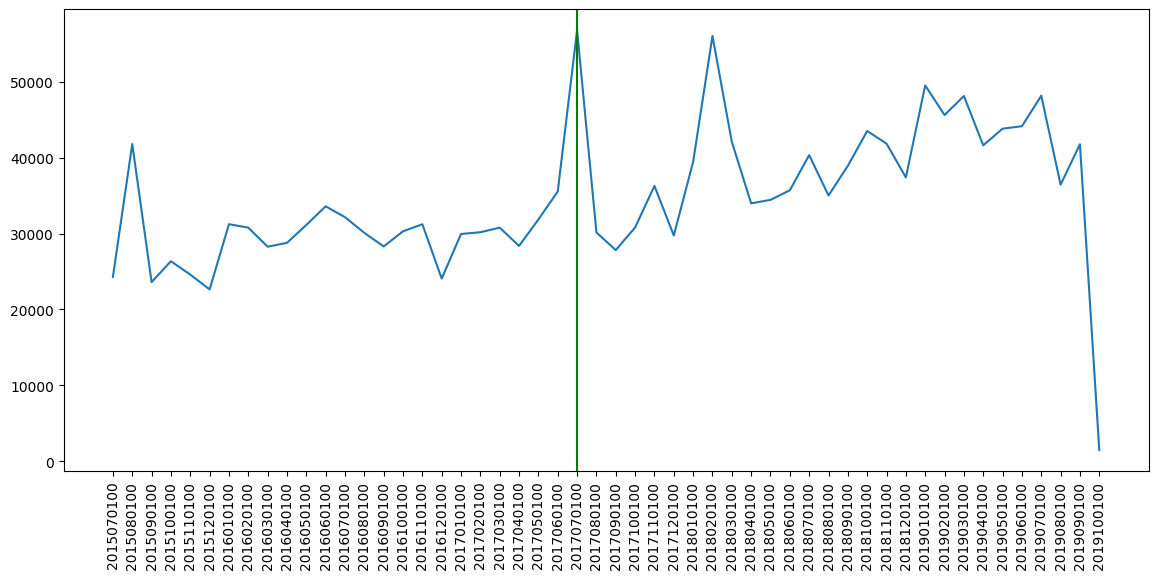

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(pageviews_df['timestamp'], pageviews_df['views'])

plt.axvline(x=max_pageviews_str, color='green')

plt.xticks(rotation=90)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get more data from Wikipedia API

Create a `get_pageviews_count()` function that receives a variable number **article names** as argument, and returns a dictionary with the sum of pageviews during 2018 for each of these article names.

- The function MUST check that at least one parameter is found, and raise a `ValueError` otherwise.

```
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{ARTICLE}/monthly/2018010100/2018123100
```

In [52]:
# your code goes here

def get_pageviews_count(*args):
    if not args:
      raise ValueError('not found')

      base_url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{}/monthly/2018010100/2018120100"
      pageviews={}

      for article in args:
        url=base_url.format(article)

        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36'
        }
        response=requests.get(url,headers=headers)
        if response.status_code == 200:
          data = response.json()
          article_df = pd.Dataframe(data['items'])
          pageviews[article]=article_df['views'].sum()

        return pageviews


Calling `get_pageviews_count('Healthy_diet', 'Food', 'Obesity')` should return something like:

```
{'Healthy_diet': 478712, 'Food': 1125874, 'Obesity': 1092577}
```

In [54]:
get_pageviews_count('Healthy_diet', 'Food', 'Obesity')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Obesity trends in the USA

Obesity in the United States is a major health issue, resulting in numerous diseases, specifically increased risk of certain types of cancer, coronary artery disease, type 2 diabetes, stroke, as well as significant increases in early mortality and economic costs.

Let's analyze obesity trends on each state of the USA. To do that take a look at the _Obesity in the United States_ Wikipedia article where they analyze obesity revalence by state and territory.

<img width="500" alt="Obesity-trends" src="https://user-images.githubusercontent.com/7065401/68873389-5a8e4100-06de-11ea-844c-5ec622af5caa.png">

In [83]:
url = 'https://en.wikipedia.org/wiki/Obesity_in_the_United_States'

# Read all tables on the page into a list of DataFrames
tables = pd.read_html(url)

# Check the number of tables and their content
print(f"Number of tables found: {len(tables)}")

# Display the first few rows of each table to find the right one
for i, table in enumerate(tables):
    print(f"\nTable {i}:")
    print(table.head())

Number of tables found: 16

Table 0:
    0                                                  1
0 NaN  This section is empty. You can help by adding ...

Table 1:
  States, district,  & territories Obesity rank Obese adults                 \
  States, district,  & territories Obesity rank  (mid-2000s) (2020)[91][97]   
0                          Alabama            5        30.1%          36.3%   
1                           Alaska            9        27.3%          34.2%   
2                   American Samoa            —            —        75%[95]   
3                          Arizona           30        23.3%          29.5%   
4                         Arkansas            7        28.1%          35.0%   

  Overweight (incl. obese) adults (mid-2000s)  \
  Overweight (incl. obese) adults (mid-2000s)   
0                                       65.4%   
1                                       64.5%   
2                                     95%[98]   
3                                       

In [103]:
url = 'https://en.wikipedia.org/wiki/Obesity_in_the_United_States'

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the HTML table at the end of the article into a `obesity_df` DataFrame object.

> Be aware of parsing correctly `NaN` values that appear as `—` characters.

<img width="450" alt="Obesity-table" src="https://user-images.githubusercontent.com/7065401/68880373-e5286d80-06e9-11ea-9bd0-f59ffcf02341.png">

In [117]:
# your code goes here
tables=pd.read_html(url, na_values='—')
obesity_df =tables[1]

obesity_df.head()

States, district,  & territories Obesity rank Obese adults                 \
  States, district,  & territories Obesity rank  (mid-2000s) (2020)[91][97]   
0                          Alabama          5.0        30.1%          36.3%   
1                           Alaska          9.0        27.3%          34.2%   
2                   American Samoa          NaN          NaN        75%[95]   
3                          Arizona         30.0        23.3%          29.5%   
4                         Arkansas          7.0        28.1%          35.0%   

  Overweight (incl. obese) adults (mid-2000s)  \
  Overweight (incl. obese) adults (mid-2000s)   
0                                       65.4%   
1                                       64.5%   
2                                     95%[98]   
3                                       59.5%   
4                                       64.7%   

  Obese children and adolescents (mid-2000s)[96]  
  Obese children and adolescents (mid-2000s)[96]  
0                                          16.7%  
1                                          11.1%  
2                                    35%[95][99]  
3                                          12.2%  
4                                          16.4%

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Sort the states by _Obesity rank_ and get the 5 states at the top. Show name and obesity rank.

In [109]:
# your code goes here
sorted_df = obesity_df.sort_values(('Obesity rank','Obesity rank'))
top_5_states = sorted_df.head(5)
top_5_states

States, district,  & territories Obesity rank Obese adults                 \
   States, district,  & territories Obesity rank  (mid-2000s) (2020)[91][97]   
53                    West Virginia          1.0        30.6%          38.1%   
26                      Mississippi          2.0        34.4%          37.3%   
39                         Oklahoma          3.0        28.1%          36.5%   
17                             Iowa          4.0        26.3%          36.4%   
0                           Alabama          5.0        30.1%          36.3%   

   Overweight (incl. obese) adults (mid-2000s)  \
   Overweight (incl. obese) adults (mid-2000s)   
53                                       66.8%   
26                                       67.4%   
39                                       64.2%   
17                                       63.4%   
0                                        65.4%   

   Obese children and adolescents (mid-2000s)[96]  
   Obese children and adolescents (mid-2000s)[96]  
53                                          20.9%  
26                                          17.8%  
39                                          15.4%  
17                                          12.5%  
0                                           16.7%

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)